### Task 1. How can we transform a text to numerical representation?​ (Write any three of them with one line description)
>1) Word embedding : 
    words or phrases from the vocabulary are mapped to vectors of real numbers. 

>2) Word2vec :
    it uses neural network to detect synonymous words or to suggest additional words for a partial sentence.
    it represents each distinct word with a particular list of numbers.

>3) Tf-idf Vectorizer (Term Frequency – Inverse Document Frequency)
The Term Frequency gives how many times the word appears in the document. and  The Inverse Document Frequency downscales words that appear a lot across the documents.

#### Note: 
 Other techiniques includes One-Hot-Encoding, Document Term Matrix, Binary features, POS / NER Tagging..etc

### Task 2. List (min) three things to evaluate a Classification model.
> Accuracy of the model.

> Confusion matrix.

> Precision, recall and Specificity.

> F1 score.

> ploting ROC and AUC curve.

### Task 3 : Scraping a News portal

In [2]:
# importing Libraries
import newspaper
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from pprint import pprint
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

import typing
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

#### Crawler To extract News from the News portal

In [3]:
def check_empty(string: str)-> str:
    """ Method  string  empty or not if empty return NULL
    """    
    return string if string else np.nan


def web_crawler(name: str, 
                url:str,
                no_of_pages: int =5
               ) -> typing.List[typing.Dict]:
    
    """Method scarpes the web pages from the specified url's
        
      input-parms 
      LIMIT: dtype--int
          You can limit the number of articles to be scrpped.
          
      name: str
      Name of the portal you wan't to scrap
      url: str
          url of the portal you wan't to scrap
                
      Returns : str 
          scarpped data  list return
        
        Note: each url's grabs diffrent info. you can take a look at the output of 
              this function to modify the colums and contents you want to grab
    """
    companies = {name: {'link': url}}
    articles_array = []

    paper = newspaper.build(url, memoize_articles=False)
    newsPaper = {"link": url,"articles": []}
    count = 1
    
    for content in paper.articles:
        if count > no_of_pages:
            break
        try:
            content.download()
            content.parse()
        except Exception as e:
            print(e)
            print("continuing...")
            continue
            
        article = {}
        
        article['Title'] = check_empty(content.title)
        article['Authors'] = check_empty(content.authors)
        article['Content'] = check_empty(content.text)
        article['Image'] = check_empty(content.top_image)
        article['Link'] = check_empty(content.url)
        article['Date_Posted'] = content.publish_date
    
        newsPaper['articles'].append(article)
        articles_array.append(article)
        print(count, "articles downloaded from", name, " using newspaper, url: ", content.url)
        count = count + 1
    return articles_array

# company_name = 'theguardian'; # url = 'https://www.theguardian.com/international'
company_name = 'washingtonpost'; url = 'https://www.washingtonpost.com/'
articles_array = web_crawler(no_of_pages= 5,name = company_name, url = url)

1 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/elections/2020/11/09/biden-trump-election-live-updates/
2 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/elections/2020/11/09/biden-trump-election-live-updates/#link-Z5NRLLYYUBC6LPF7DADYRJ4EVE
3 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/elections/2020/11/09/biden-trump-election-live-updates/#link-PLCONXFNYFET5ASWQ3CNXW4QOY
4 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/elections/2020/11/09/biden-trump-election-live-updates/#link-SHJWESIAZVCBZB4KFJV7W66TZQ
5 articles downloaded from washingtonpost  using newspaper, url:  https://www.washingtonpost.com/elections/2020/11/09/biden-trump-election-live-updates/#link-AOAGI3F7FFCJZIBDLANLK25424


#### Now we have scarpped data. let's create a Data frame and store that data frame in Csv fomate 

In [4]:
df = pd.DataFrame.from_dict(articles_array, orient='columns', dtype=None, columns=None)
df.to_csv('news.csv')

### Task 4 : Perform exploratory data analysis.

#### Retrieving the named entities.

In [5]:
# let's load Spicy English multi-task Cnn model.
# This Assigns context-specific token vectors, POS tags, dependency parse and named entities .
nlp = en_core_web_sm.load()

In [6]:
def retrieve_named_entities(df: pd.DataFrame, 
                            column: str = 'Content') -> str:
    """
    Retrieve the named entities of a perticular column
    
    parms:  -dataframe
            -coumn name : to retrieve the named entities
    
    outputs: Retrieved named entities
    """
    ne = []
    for content in df[str(column)]:
        doc = nlp(content)
        ne.append([(X.text, X.label_) for X in doc.ents])
            
    return('Named entities of Contents are idntified are', ne);
    
###############################################################################################################
    
def Display_named_entities(df: pd.DataFrame, 
                           item: int = 0, 
                           no_of_sentence: int = 1, 
                           column: str = 'Content', 
                           dist: int = 80) -> None:
    """
    To visilize The raw markup by generating "displacy.render" function
    
    Parms:  -df : dataframe
            -column : which column you want to explore
            -item : which row in that column you want to explore
            -no_of_sentence : Specifies which data col you need to explore
            -dist : width for displaying the tree in Notebook
            
    return : The named entities in raw and Tree formate.
    
    """
    doc = df[column][item]
    doc = nlp(doc)
    sentences = [x for x in doc.sents]
    print('\n1) Displays the named entities in raw Formate.')
    
    displacy.render(nlp(str(sentences[no_of_sentence])), jupyter=True, style='ent')
    print('\n2) Displays the named entities in Tree Formate.')
    displacy.render(nlp(str(sentences[no_of_sentence])), style='dep', jupyter = True, options = {'distance': dist})

In [7]:
df = pd.read_csv('news.csv',index_col=0)
# let's print the named entities of frist text
retrieve_named_entities(df, column = 'Content')[1][1]

[('Joe Gloria', 'PERSON'),
 ('Nevada', 'GPE'),
 ('Clark County', 'GPE'),
 ('Democratic', 'NORP'),
 ('Biden', 'LOC'),
 ('more than 36,000', 'CARDINAL'),
 ('Trump', 'ORG'),
 ('Monday', 'DATE'),
 ('Trump', 'ORG'),
 ('Nevada', 'GPE'),
 ('GOP', 'ORG'),
 ('Gloria', 'PERSON'),
 ('Monday', 'DATE'),
 ('Trump', 'ORG'),
 ('Republicans', 'NORP'),
 ('Clark County', 'GPE'),
 ('Sunday', 'DATE'),
 ('Trump', 'ORG'),
 ('Matt Schlapp', 'PERSON'),
 ('the American Conservative Union', 'ORG'),
 ('thousands', 'CARDINAL'),
 ('Nevada', 'GPE'),
 ('Aaron D. Ford', 'PERSON'),
 ('Ford', 'PERSON'),
 ('Last week', 'DATE'),
 ('Trump', 'ORG'),
 ('the Justice Department', 'ORG'),
 ('more than 3,000', 'CARDINAL'),
 ('Nevada', 'GPE'),
 ('Sunday', 'DATE'),
 ('9,000', 'CARDINAL'),
 ('Clark County', 'GPE'),
 ('Clark County', 'GPE')]

In [8]:
Display_named_entities(df, item = 0, no_of_sentence = 1, column = 'Content', dist = 80)


1) Displays the named entities in raw Formate.



2) Displays the named entities in Tree Formate.


#### Word Count
Counting number of words are present in the perticular column, hear we are working on 'Content' column

In [9]:
def word_count(dataframe,
               column: str = 'Content') -> None:
    '''
        This Function Prints the word count 
        Parms :  -df : Dataframe
        column : which column of the Dataframe need to be explore
    '''
    for n,content in enumerate(dataframe[str(column)]):
        doc = nlp(content)
        labels = [x.label_ for x in doc.ents]
        
        if labels:
            print('word count of',n,'is')
            pprint(Counter(labels));print()

In [10]:
word_count(df)

word count of 0 is
Counter({'GPE': 8,
         'ORG': 8,
         'PERSON': 5,
         'DATE': 5,
         'CARDINAL': 4,
         'NORP': 2,
         'LOC': 1})

word count of 1 is
Counter({'GPE': 8,
         'ORG': 8,
         'PERSON': 5,
         'DATE': 5,
         'CARDINAL': 4,
         'NORP': 2,
         'LOC': 1})

word count of 2 is
Counter({'GPE': 8,
         'ORG': 8,
         'PERSON': 5,
         'DATE': 5,
         'CARDINAL': 4,
         'NORP': 2,
         'LOC': 1})

word count of 3 is
Counter({'GPE': 8,
         'ORG': 8,
         'PERSON': 5,
         'DATE': 5,
         'CARDINAL': 4,
         'NORP': 2,
         'LOC': 1})

word count of 4 is
Counter({'GPE': 8,
         'ORG': 8,
         'PERSON': 5,
         'DATE': 5,
         'CARDINAL': 4,
         'NORP': 2,
         'LOC': 1})



#### Now let's perform prepossing the text to explore data further
includes 3 steps
>1) removing punctuation

>2) Converting the text to lowercase

>3) Join the processed text together

In [11]:
def remove_punctuation(df : pd.DataFrame, 
                       col: str) -> pd.DataFrame:
    """Helper function to remove punctuation
    """
    return df[col].map(lambda x: re.sub('[,\.!?]', '', x))

def convert_lower(df: pd.DataFrame, 
                  col: str) -> pd.DataFrame:
    """ Helper function to Convert the text to lowercase
    """
    return df[col].map(lambda x: x.lower())

def preprocessing(df:  pd.DataFrame) -> str:
    """
    Method to preprocess the text of data
    
    Parms : -df:Dataframe
    
    retruns the prosesed text
    """
    df['Content_modify'] = remove_punctuation(df, col ='Content')
    df['Content_modify'] = convert_lower(df, col ='Content_modify')
    # Join the different processed text together.
    text = ','.join(list(df["Content_modify"].values))
    return text

text = preprocessing(df)
# df['Content_modify'].head()

#### Let's create a function That gives visual representation of word-cloud and word-freqencies

In [12]:
def Draw_WordCloud_frequency(text: str, 
                             max_words: int =10) -> None:
    """
    Method to Displays word-cloud and word-freqencies graph
    
    parmeter
        df: pd.DataFrame, 
        col: which column you want to explore
        max_words: length of maximum words explore

    Displays word-cloud and word-freqencies graph 
    
    """
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=max_words, contour_width=3,
                          contour_color='steelblue')
    
    # Generate a word cloud
    wordcloud.generate(text)
    
    # Visualize the word cloud
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
#   Visualize the word Frequency graph
    x, y = zip(* wordcloud.words_.items())
    plt.figure(figsize=(10,8))
    plt.bar(x, y)
    plt.xticks(rotation=60, fontsize=20);plt.yticks(fontsize=10)
    plt.title('Frequency of 10 Most Common Words', fontsize=20)
    plt.xlabel('Words', fontsize=20);plt.ylabel('Frequency of Words', fontsize=20)

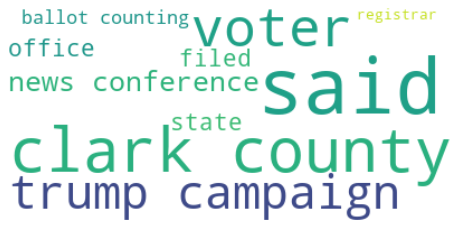

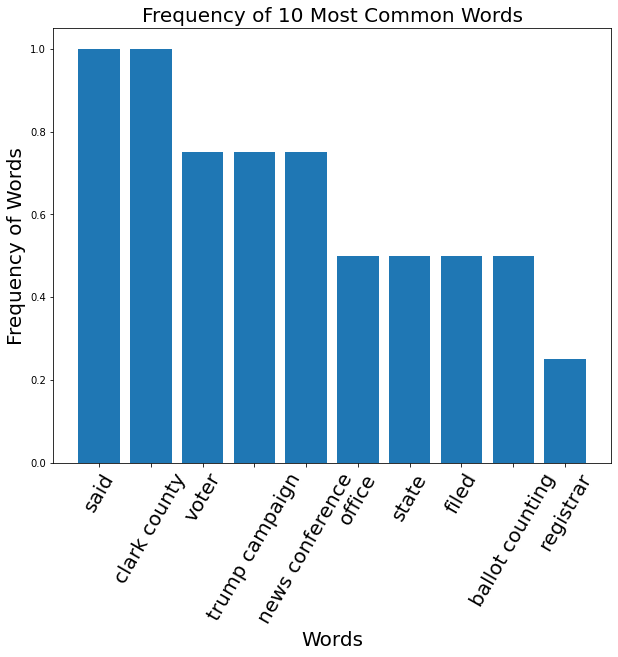

In [13]:
Draw_WordCloud_frequency(text)

### Topic modelling
#### now we perform Topic modeling using LatentDirichletAllocation with the help of CountVectorizer

In [14]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the preprocessed content
count_data = count_vectorizer.fit_transform(df['Content_modify']) 

In [15]:
def print_topics(model:object, 
                 count_vectorizer:object, 
                 n_top_words:int) -> None:
    """
    This is the Helper function to display Topics of the model
    
    parm: 
        model: model used, 
        count_vectorizer: pre processed Data, 
        n_top_words: how many words you need to Display

    """
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic : {topic_idx+1}")
        print(" ".join([words[i]for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Create and fit the LDA model
number_topics = 4
number_words = 12
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic : 1
campaign trump county said clark nevada office news state conference voters ballots

Topic : 2
worked gop examples federal file filled flooded formal forward forwarded fraud free

Topic : 3
worked gop examples federal file filled flooded formal forward forwarded fraud free

Topic : 4
worked gop examples federal file filled flooded formal forward forwarded fraud free


### -------------------------------------------End--------------------------------------